In [5]:

#from architecture import MicrocolonyNet
import os
if os.path.exists('Microcolony-AutoAugment'):
    os.chdir('Microcolony-AutoAugment')

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import torch
#from efficientnet_pytorch import EfficientNet
from torchvision import transforms
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import cv2

# from grad_cam import GradCAM

In [4]:
train_dir = '/mnt/data/mcolony-classification-data/train/60x-3h-2'
test_dir = '/mnt/data/mcolony-classification-data/test/60x-3h-2-var/brightfield'

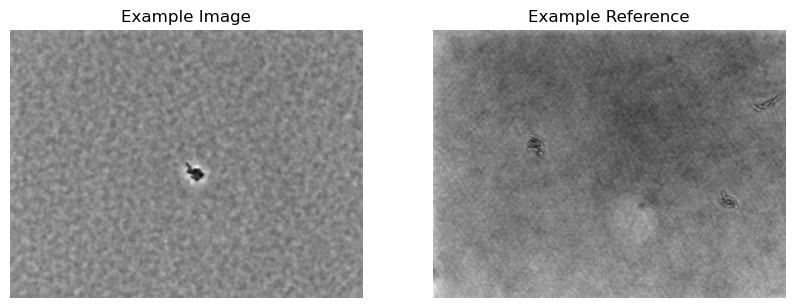

In [34]:
ex_img = cv2.imread('/mnt/data/mcolony-classification-data/train/60x-3h-2/Lm-60x-3h/Lm1425-60x-3h-220331-R3-18.jpg')
ex_ref = cv2.imread('/mnt/data/mcolony-classification-data/test/60x-3h-2-var/brightfield/Lm-60x-3h-BF-20220821-R2-005.jpg')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(ex_img)
ax[0].set_title('Example Image')
ax[0].axis('off')
ax[1].imshow(ex_ref)
ax[1].set_title('Example Reference')
ax[1].axis('off')
plt.show()


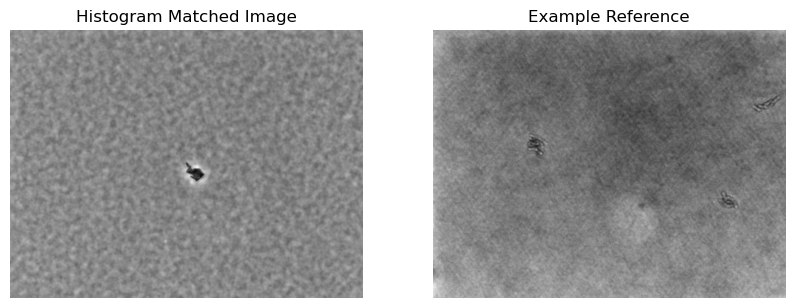

In [35]:
aug = A.Compose([A.HistogramMatching([ex_ref], blend_ratio=[0,.1], p=1, read_fn=lambda x: x)])
result = aug(image=ex_img)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(result['image'])
ax[0].set_title('Histogram Matched Image')
ax[0].axis('off')
ax[1].imshow(ex_ref)
ax[1].set_title('Example Reference')
ax[1].axis('off')
plt.show()

ok that was sad
i guess lets try something else

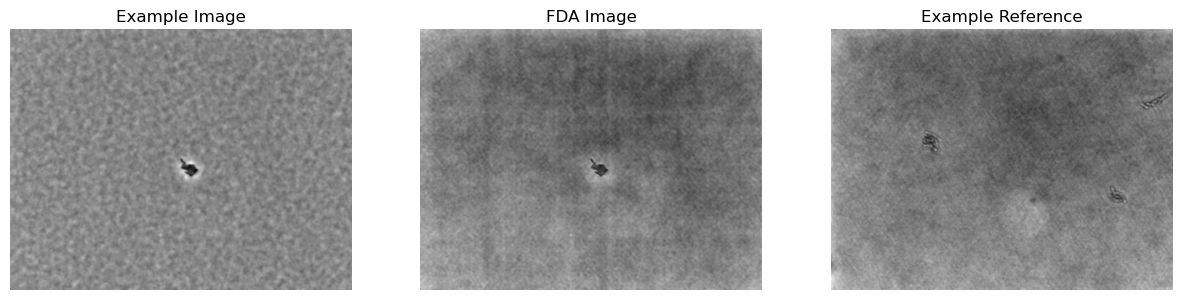

In [36]:
aug = A.Compose([A.FDA([ex_ref], beta_limit=.5, p=1, read_fn=lambda x: x)])
result = aug(image=ex_img)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(ex_img)
ax[0].set_title('Example Image')
ax[0].axis('off')
ax[1].imshow(result['image'])
ax[1].set_title('FDA Image')
ax[1].axis('off')
ax[2].imshow(ex_ref)
ax[2].set_title('Example Reference')
ax[2].axis('off')

plt.show()

dang ok not bad. whats a fourier transform again?